<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY-9163-ML-cyber/blob/main/Lab/MLSec_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3
You must do the project individually. In this HW you will design a backdoor detector for 
BadNets trained on the YouTube Face dataset using the pruning defense discussed in 
class. Your detector will take as input:
1. B, a backdoored neural network classifier with N classes.
2. Dvalid, a validation dataset of clean, labelled images.

What you must output is G a “repaired” BadNet. G has N+1 classes, and given unseen test 
input, it must: 
1. Output the correct class if the test input is clean. The correct class will be in [1,N].
2. Output class N+1 if the input is backdoored.

You will design G using the pruning defense that we discussed in class. That is, you will prune the last convlution layer of BadNet B (the layer just before the FC layers, it should has the pooling layer after) by removing one 
channel at a time from that layer. Channels should be removed in increasing order of average activation values over the entire validation set. Every time you prune a channel, you will  measure the new validation accuracy of the new pruned badnet. You will stop pruning once the  validation accuracy drops atleast X% below the original accuracy. This will be your new 
network B'. Now, your goodnet G works as follows. For each test input, you will run it through both B and  B'. If the classification outputs are the same, i.e., class i, you will output class i. If they differ you  will output N+1. Evaluate this defense on:
1. A BadNet, B1, (“sunglasses backdoor”) on YouTube Face for which we have already  told you what the backdoor looks like. That is, we give you the validation data, and  also test data with examples of clean and backdoored inputs.

Now you must submit:
1. Your repaired networks for X={2%,4%,10%}. The repaired networks will be evaluated using the evaluation script (eval.py) on this website https://github.com/csaw-hackml/CSAW-HackML-2020. This website hosts all the information and data for the project.
2. Plot the accuracy on clean test data and the attack success rate (on backdoored test 
data) as a function of the fraction of channels pruned. 
3. Please create and submit a link to a GitHub repo. with any/all code you have produced in this project along with a Readme that tells us how to run your code and your HW report.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import keras
import sys
import h5py
import numpy as np

clean_data_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Data/clean/valid.h5'
poisoned_data_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Data/bd/bd_valid.h5'
model_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Model/bd_net.h5'

def data_loader(filepath):
    data = h5py.File(filepath, 'r')
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])
    x_data = x_data.transpose((0,2,3,1))

    return x_data, y_data

def main():
    cl_x_test, cl_y_test = data_loader(clean_data_filename)
    bd_x_test, bd_y_test = data_loader(poisoned_data_filename)

    bd_model = keras.models.load_model(model_filename)

    cl_label_p = np.argmax(bd_model.predict(cl_x_test), axis=1)
    clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
    print('Clean Classification accuracy:', clean_accuracy)
    
    bd_label_p = np.argmax(bd_model.predict(bd_x_test), axis=1)
    asr = np.mean(np.equal(bd_label_p, bd_y_test))*100
    print('Attack Success Rate:', asr)

if __name__ == '__main__':
    main()

Clean Classification accuracy: 98.64899974019225
Attack Success Rate: 100.0


In [5]:
model = keras.models.load_model(model_filename)

In [ ]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 55, 47, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 52, 44, 20)   980         ['input[0][0]']                  
                                                                                                  
 pool_1 (MaxPooling2D)          (None, 26, 22, 20)   0           ['conv_1[0][0]']                 
                                                                                                  
 conv_2 (Conv2D)                (None, 24, 20, 40)   7240        ['pool_1[0][0]']                 
                                                                                            

In [ ]:
x_data, y_data = data_loader(clean_data_filename)

In [ ]:
y = model.predict(x_data[0])

In [ ]:
print(y[0])

[2.6487895e-36 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 4.8857488e-23]


In [ ]:
print(x_data.shape)

(11547, 55, 47, 3)


In [ ]:
layer_output=model_temp.get_layer('pool_3').output
intermediate_model=keras.models.Model(inputs=model_temp.input,outputs=layer_output)
intermediate_prediction=intermediate_model.predict(x_data)
print(intermediate_prediction.shape)

(11547, 5, 4, 60)


In [ ]:
temp1 = np.mean(intermediate_prediction,axis=(0,1,2))
temp1 = np.delete(temp1, 0)

In [ ]:
print(temp1.shape)

(59,)


In [ ]:
model_temp = keras.models.clone_model(model)

In [ ]:
model_temp.layers[5].get_weights()[0].shape
print(model_temp.layers[5].get_weights()[0][:,:,:,0])

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
weight_0 = model_temp.layers[5].get_weights()[0]
bias_0 = model_temp.layers[5].get_weights()[1]
weight_0[:,:,:,0] = 0
bias_0[0] = 0


[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
model_temp.layers[5].set_weights([weight_0, bias_0])

In [ ]:
print(len(out))

In [ ]:
# print(intermediate_prediction.shape)
# print(intermediate_prediction[0][0])
temp = np.mean(intermediate_prediction,axis=(1,2))
print(np.argmin(temp[0]))

0


(55, 47, 3)


(-0.5, 46.5, 54.5, -0.5)

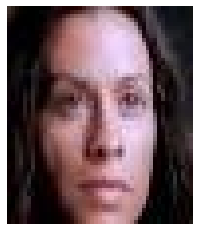

In [ ]:

plt.imshow(x_data[0]/255)
plt.axis("off")

In [ ]:
model.get_layer(name='pool_3')

AttributeError: ignored

In [ ]:
print(min(5,10))

5


In [ ]:
layer_output=model_copy.get_layer('pool_3').output.shape[3]
print(layer_output)

60


In [6]:
keras.backend.clear_session()

Official to write it

In [7]:
cl_x_test, cl_y_test = data_loader(clean_data_filename)
bd_x_test, bd_y_test = data_loader(poisoned_data_filename)

In [ ]:
clean_data_acc = 98.64899974019225 # original accuracy
model_copy = keras.models.clone_model(model)
model_copy.set_weights(model.get_weights()) 
prune_index = []
clean_acc = []
asrate = []
# model_copy.get_layer('pool_3').output.shape[3])
for channel_num in tqdm(range(model_copy.get_layer('pool_3').output.shape[3])):
  min_value = 99999.9999
  min_prune_index = 0
  layer_output=model_copy.get_layer('pool_3').output
  intermediate_model=keras.models.Model(inputs=model_copy.input,outputs=layer_output)
  intermediate_prediction=intermediate_model.predict(cl_x_test)  
  temp = np.mean(intermediate_prediction,axis=(0,1,2))
  for index, value in enumerate(temp):
    if index not in prune_index:
      if value < min_value:
        min_value = min(min_value, value)
        min_prune_index = index
  prune_index.append(min_prune_index)
  # index = 5 means 'conv_3'
  weight_0 = model_copy.layers[5].get_weights()[0]
  bias_0 = model_copy.layers[5].get_weights()[1]
  weight_0[:,:,:,min_prune_index] = 0
  bias_0[min_prune_index] = 0
  model_copy.layers[5].set_weights([weight_0, bias_0])
  cl_label_p = np.argmax(model_copy.predict(cl_x_test), axis=1)
  clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
  if (clean_data_acc-clean_accuracy <= 2):
    model_copy.save('model_X=2.h5')
  if ((clean_data_acc-clean_accuracy) <= 4 and (clean_data_acc-clean_accuracy) >= 2):
    model_copy.save('model_X=4.h5')
  if ((clean_data_acc-clean_accuracy) <= 10 and (clean_data_acc-clean_accuracy) > 6):
    model_copy.save('model_X=10.h5')
  clean_acc.append(clean_accuracy)
  print(clean_accuracy)
  bd_label_p = np.argmax(model_copy.predict(bd_x_test), axis=1)
  asr = np.mean(np.equal(bd_label_p, bd_y_test))*100
  asrate.append(asr)
  keras.backend.clear_session()

  0%|          | 0/60 [00:00<?, ?it/s]

98.64899974019225


  2%|▏         | 1/60 [00:26<25:54, 26.35s/it]

98.64899974019225


  3%|▎         | 2/60 [00:54<26:37, 27.54s/it]

98.64899974019225


  5%|▌         | 3/60 [01:21<25:37, 26.98s/it]

98.64899974019225


  7%|▋         | 4/60 [01:52<26:52, 28.80s/it]

98.64899974019225


  8%|▊         | 5/60 [02:21<26:16, 28.66s/it]

98.64899974019225


 10%|█         | 6/60 [02:49<25:42, 28.56s/it]

98.64899974019225


 12%|█▏        | 7/60 [03:14<24:20, 27.55s/it]

98.64899974019225


 13%|█▎        | 8/60 [03:43<24:15, 27.99s/it]

98.64899974019225


 15%|█▌        | 9/60 [04:15<24:44, 29.11s/it]

98.64899974019225


 17%|█▋        | 10/60 [04:42<23:45, 28.51s/it]

98.64899974019225


 18%|█▊        | 11/60 [05:11<23:18, 28.54s/it]

98.64899974019225


 20%|██        | 12/60 [05:36<22:04, 27.60s/it]

98.64899974019225


 22%|██▏       | 13/60 [06:05<21:54, 27.97s/it]

98.64899974019225


 23%|██▎       | 14/60 [06:35<21:51, 28.51s/it]

98.64899974019225


 25%|██▌       | 15/60 [07:04<21:32, 28.72s/it]

98.64899974019225


 27%|██▋       | 16/60 [07:32<20:59, 28.62s/it]

98.64899974019225


 28%|██▊       | 17/60 [08:12<23:00, 32.10s/it]

98.64899974019225


 30%|███       | 18/60 [08:43<22:10, 31.67s/it]

98.64899974019225


 32%|███▏      | 19/60 [09:25<23:49, 34.88s/it]

98.64899974019225


 33%|███▎      | 20/60 [09:54<21:55, 32.89s/it]

98.64899974019225


 35%|███▌      | 21/60 [10:25<21:02, 32.37s/it]

98.64899974019225


 37%|███▋      | 22/60 [10:53<19:39, 31.05s/it]

98.64899974019225


 38%|███▊      | 23/60 [11:46<23:10, 37.57s/it]

98.64899974019225


 40%|████      | 24/60 [12:15<21:01, 35.03s/it]

98.64899974019225


 42%|████▏     | 25/60 [12:46<19:50, 34.02s/it]

98.64899974019225


 43%|████▎     | 26/60 [13:14<18:13, 32.15s/it]

98.64899974019225


 45%|████▌     | 27/60 [13:44<17:19, 31.50s/it]

98.64899974019225


 47%|████▋     | 28/60 [14:13<16:25, 30.81s/it]

98.64899974019225


 48%|████▊     | 29/60 [14:43<15:44, 30.46s/it]

98.64899974019225


 50%|█████     | 30/60 [15:10<14:39, 29.33s/it]

98.64899974019225


 52%|█████▏    | 31/60 [15:39<14:07, 29.23s/it]

98.64899974019225


 53%|█████▎    | 32/60 [16:03<12:55, 27.69s/it]

98.64899974019225


 55%|█████▌    | 33/60 [16:29<12:13, 27.18s/it]

98.64033948211657


 57%|█████▋    | 34/60 [16:55<11:41, 27.00s/it]

98.64033948211657


 58%|█████▊    | 35/60 [17:25<11:33, 27.73s/it]

98.63167922404088


 60%|██████    | 36/60 [17:51<10:56, 27.34s/it]

98.65765999826795


 62%|██████▏   | 37/60 [18:18<10:24, 27.15s/it]

98.64899974019225


 63%|██████▎   | 38/60 [18:47<10:12, 27.83s/it]

98.6056984498138


 65%|██████▌   | 39/60 [19:13<09:31, 27.20s/it]

98.57105741751104


 67%|██████▋   | 40/60 [19:45<09:30, 28.55s/it]

98.53641638520828


 68%|██████▊   | 41/60 [20:14<09:05, 28.69s/it]

98.19000606218066


 70%|███████   | 42/60 [20:45<08:52, 29.58s/it]

97.65307006148784


 72%|███████▏  | 43/60 [21:11<08:03, 28.47s/it]

97.50584567420108


 73%|███████▎  | 44/60 [21:35<07:12, 27.01s/it]

95.75647354291158


 75%|███████▌  | 45/60 [22:01<06:42, 26.82s/it]

95.20221702606739


 77%|███████▋  | 46/60 [22:28<06:14, 26.73s/it]

94.7172425738287


 78%|███████▊  | 47/60 [22:57<05:56, 27.44s/it]

92.09318437689443


 80%|████████  | 48/60 [23:23<05:25, 27.15s/it]

91.49562656967177


 82%|████████▏ | 49/60 [23:53<05:05, 27.74s/it]

91.01931237550879


 83%|████████▎ | 50/60 [24:22<04:41, 28.14s/it]

89.17467740538669


 85%|████████▌ | 51/60 [24:48<04:08, 27.66s/it]

84.43751623798389


 87%|████████▋ | 52/60 [25:17<03:43, 27.90s/it]

76.48739932449988


 88%|████████▊ | 53/60 [25:43<03:11, 27.34s/it]

54.8627349095003


 90%|█████████ | 54/60 [26:09<02:42, 27.16s/it]

27.08928726076037


 92%|█████████▏| 55/60 [26:38<02:18, 27.73s/it]

13.87373343725643


 93%|█████████▎| 56/60 [27:02<01:45, 26.49s/it]

7.101411622066338


 95%|█████████▌| 57/60 [27:31<01:21, 27.28s/it]

1.5501861955486274


 97%|█████████▋| 58/60 [27:58<00:54, 27.04s/it]

0.7188014202823244


 98%|█████████▊| 59/60 [28:27<00:27, 27.68s/it]

0.0779423226812159


100%|██████████| 60/60 [28:55<00:00, 28.92s/it]


In [ ]:
print(clean_acc)
print(asrate)

[98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64033948211657, 98.64033948211657, 98.63167922404088, 98.65765999826795, 98.64899974019225, 98.6056984498138, 98.57105741751104, 98.53641638520828, 98.19000606218066, 97.65307006148784, 97.50584567420108, 95.75647354291158, 95.20221702606739, 94.7172425738287, 92.09318437689443, 91.49562656967177, 91.01931237550879, 89.17467740538669, 84.43751623798389, 76.4873993244

Text(0.5, 0, 'fraction of pruned channels')

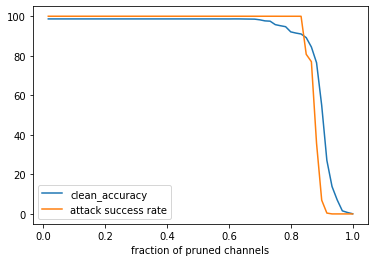

In [ ]:
x_axis = np.arange(1,61)/60
plt.plot(x_axis,clean_acc)
plt.plot(x_axis,asrate)
plt.legend(['clean_accuracy','attack success rate'])
plt.xlabel("fraction of pruned channels")

In [ ]:
print(prune_index)

[0, 2, 9, 12, 13, 14, 15, 17, 24, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 39, 40, 41, 44, 45, 47, 48, 49, 50, 53, 55, 59, 23, 6, 51, 32, 22, 21, 20, 19, 43, 58, 3, 42, 1, 29, 16, 56, 46, 5, 8, 11, 54, 10, 28, 35, 18, 4, 7, 52, 57]


In [ ]:

model_copy = keras.models.clone_model(model)
model_copy.set_weights(model.get_weights()) 
# cl_label_p = np.argmax(model_copy.predict(cl_x_test), axis=1)
# clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
# print(clean_accuracy)

In [ ]:
model_copy.save('my_model=2.h5')

Another way

In [8]:
clean_data_acc = 98.64899974019225 # original accuracy
model_copy = keras.models.clone_model(model)
model_copy.set_weights(model.get_weights()) 
prune_index = []
clean_acc = []
asrate = []

layer_output=model_copy.get_layer('pool_3').output
intermediate_model=keras.models.Model(inputs=model_copy.input,outputs=layer_output)
intermediate_prediction=intermediate_model.predict(cl_x_test)  
temp = np.mean(intermediate_prediction,axis=(0,1,2))
seq = np.argsort(temp)


for channel_index in tqdm(seq):
  weight_0 = model_copy.layers[5].get_weights()[0]
  bias_0 = model_copy.layers[5].get_weights()[1]
  weight_0[:,:,:,channel_index] = 0
  bias_0[channel_index] = 0
  model_copy.layers[5].set_weights([weight_0, bias_0])
  cl_label_p = np.argmax(model_copy.predict(cl_x_test), axis=1)
  clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
  if (clean_data_acc-clean_accuracy <= 2):
    model_copy.save('model_X=2.h5')
  if ((clean_data_acc-clean_accuracy) <= 4 and (clean_data_acc-clean_accuracy) >= 2):
    model_copy.save('model_X=4.h5')
  if ((clean_data_acc-clean_accuracy) <= 10 and (clean_data_acc-clean_accuracy) > 6):
    model_copy.save('model_X=10.h5')
  clean_acc.append(clean_accuracy)
  print(clean_accuracy)
  bd_label_p = np.argmax(model_copy.predict(bd_x_test), axis=1)
  asr = np.mean(np.equal(bd_label_p, bd_y_test))*100
  asrate.append(asr)
  keras.backend.clear_session()


  0%|          | 0/60 [00:00<?, ?it/s]

98.64899974019225


  2%|▏         | 1/60 [00:20<20:00, 20.35s/it]

98.64899974019225


  3%|▎         | 2/60 [00:39<18:56, 19.59s/it]

98.64899974019225


  5%|▌         | 3/60 [00:58<18:29, 19.47s/it]

98.64899974019225


  7%|▋         | 4/60 [01:16<17:25, 18.67s/it]

98.64899974019225


  8%|▊         | 5/60 [01:35<17:15, 18.82s/it]

98.64899974019225


 10%|█         | 6/60 [01:54<17:01, 18.92s/it]

98.64899974019225


 12%|█▏        | 7/60 [02:13<16:52, 19.10s/it]

98.64899974019225


 13%|█▎        | 8/60 [02:32<16:32, 19.09s/it]

98.64899974019225


 15%|█▌        | 9/60 [02:52<16:13, 19.09s/it]

98.64899974019225


 17%|█▋        | 10/60 [03:09<15:25, 18.51s/it]

98.64899974019225


 18%|█▊        | 11/60 [03:30<15:45, 19.29s/it]

98.64899974019225


 20%|██        | 12/60 [03:49<15:22, 19.22s/it]

98.64899974019225


 22%|██▏       | 13/60 [04:08<15:01, 19.19s/it]

98.64899974019225


 23%|██▎       | 14/60 [04:27<14:42, 19.20s/it]

98.64899974019225


 25%|██▌       | 15/60 [04:46<14:23, 19.19s/it]

98.64899974019225


 27%|██▋       | 16/60 [05:04<13:46, 18.78s/it]

98.64899974019225


 28%|██▊       | 17/60 [05:22<13:09, 18.37s/it]

98.64899974019225


 30%|███       | 18/60 [05:41<13:01, 18.61s/it]

98.64899974019225


 32%|███▏      | 19/60 [06:01<12:58, 18.98s/it]

98.64899974019225


 33%|███▎      | 20/60 [06:20<12:42, 19.05s/it]

98.64899974019225


 35%|███▌      | 21/60 [06:51<14:48, 22.78s/it]

98.64899974019225


 37%|███▋      | 22/60 [07:12<13:56, 22.01s/it]

98.64899974019225


 38%|███▊      | 23/60 [07:33<13:23, 21.73s/it]

98.64899974019225


 40%|████      | 24/60 [07:50<12:17, 20.47s/it]

98.64899974019225


 42%|████▏     | 25/60 [08:10<11:48, 20.23s/it]

98.64899974019225


 43%|████▎     | 26/60 [08:31<11:36, 20.49s/it]

98.64899974019225


 45%|████▌     | 27/60 [09:03<13:10, 23.94s/it]

98.64899974019225


 47%|████▋     | 28/60 [09:22<12:01, 22.53s/it]

98.64899974019225


 48%|████▊     | 29/60 [09:41<11:05, 21.45s/it]

98.64899974019225


 50%|█████     | 30/60 [10:00<10:20, 20.68s/it]

98.64899974019225


 52%|█████▏    | 31/60 [10:21<10:06, 20.92s/it]

98.64899974019225


 53%|█████▎    | 32/60 [10:40<09:30, 20.37s/it]

98.64899974019225


 55%|█████▌    | 33/60 [10:58<08:44, 19.41s/it]

98.64033948211657


 57%|█████▋    | 34/60 [11:15<08:11, 18.92s/it]

98.64033948211657


 58%|█████▊    | 35/60 [11:37<08:09, 19.57s/it]

98.63167922404088


 60%|██████    | 36/60 [11:56<07:47, 19.49s/it]

98.65765999826795


 62%|██████▏   | 37/60 [12:16<07:30, 19.60s/it]

98.64899974019225


 63%|██████▎   | 38/60 [12:33<06:57, 18.97s/it]

98.6056984498138


 65%|██████▌   | 39/60 [12:54<06:51, 19.62s/it]

98.57105741751104


 67%|██████▋   | 40/60 [13:12<06:23, 19.16s/it]

98.53641638520828


 68%|██████▊   | 41/60 [13:32<06:04, 19.16s/it]

98.19000606218066


 70%|███████   | 42/60 [13:51<05:46, 19.23s/it]

97.65307006148784


 72%|███████▏  | 43/60 [14:13<05:41, 20.09s/it]

97.50584567420108


 73%|███████▎  | 44/60 [14:34<05:26, 20.39s/it]

95.75647354291158


 75%|███████▌  | 45/60 [14:53<04:59, 19.95s/it]

95.20221702606739


 77%|███████▋  | 46/60 [15:13<04:37, 19.82s/it]

94.7172425738287


 78%|███████▊  | 47/60 [15:32<04:14, 19.60s/it]

92.09318437689443


 80%|████████  | 48/60 [15:53<04:00, 20.05s/it]

91.49562656967177


 82%|████████▏ | 49/60 [16:12<03:38, 19.90s/it]

91.01931237550879


 83%|████████▎ | 50/60 [16:33<03:22, 20.26s/it]

89.17467740538669


 85%|████████▌ | 51/60 [16:55<03:04, 20.53s/it]

84.43751623798389


 87%|████████▋ | 52/60 [17:14<02:42, 20.30s/it]

76.48739932449988


 88%|████████▊ | 53/60 [17:32<02:15, 19.40s/it]

54.8627349095003


 90%|█████████ | 54/60 [17:51<01:55, 19.32s/it]

27.08928726076037


 92%|█████████▏| 55/60 [18:12<01:39, 19.84s/it]

13.87373343725643


 93%|█████████▎| 56/60 [18:29<01:16, 19.01s/it]

7.101411622066338


 95%|█████████▌| 57/60 [18:48<00:57, 19.04s/it]

1.5501861955486274


 97%|█████████▋| 58/60 [19:07<00:38, 19.01s/it]

0.7188014202823244


 98%|█████████▊| 59/60 [19:25<00:18, 18.85s/it]

0.0779423226812159


100%|██████████| 60/60 [19:41<00:00, 19.70s/it]


Text(0.5, 0, 'fraction of pruned channels')

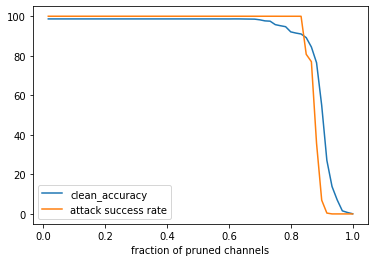

In [9]:
x_axis = np.arange(1,61)/60
plt.plot(x_axis,clean_acc)
plt.plot(x_axis,asrate)
plt.legend(['clean_accuracy','attack success rate'])
plt.xlabel("fraction of pruned channels")